<a href="https://colab.research.google.com/github/ICBI/AIMAHEAD_GU/blob/main/Module_04_Handling_Non_Linearity_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/ICBI/AIMAHEAD_GU_publicCourseData/main/AAlogo1.jpg" alt="Powered by" width="150"/>

# AI/ML for Healthcare Applications : Lab 4 Handling non-linear data, Regularization, Feature Crosses and SVM kernels

Based on material from the Georgetown [Health Informatics and Data Science](https://healthinformatics.georgetown.edu) program and licensed under  [CC4.0](https://creativecommons.org/licenses/by/4.0/) 

In this workshop we will explore how to classify non-linear data using linear classifiers such as Logistic Regression and SVM

#### **Packages**

We will start by loading some of the packages that will help us 
organize and visualize the data. Other packages will be loaded as necessary.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# use seaborn plotting defaults
import seaborn as sns; sns.set()
matplotlib.rcParams['figure.figsize'] = (10, 10)

#### **Logistic Regression as a linear classifier: Recap**


Generate linear seperable synthetic data

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
X, y = make_classification(n_samples=200,
                           n_features=2,  
                           n_redundant=0, 
                           n_informative=2, 
                           n_clusters_per_class=1)

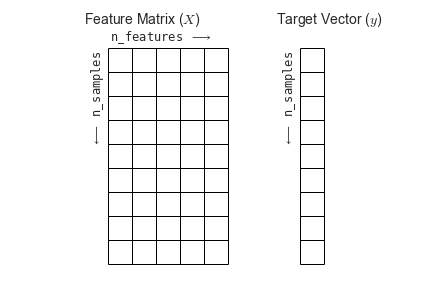

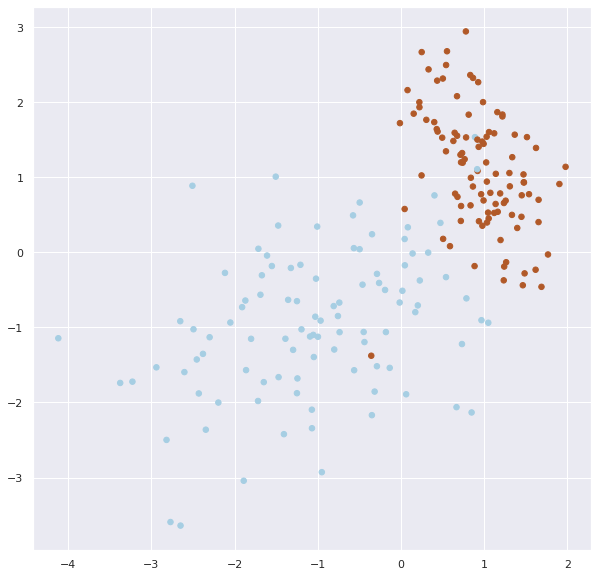

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

In [ ]:
X.shape, y.shape

((200, 2), (200,))

In [ ]:
X[:5]

array([[ 0.15253295,  1.8499346 ],
       [ 0.01679129, -0.51086553],
       [ 1.19676458,  0.16547144],
       [ 1.65361521,  0.40478248],
       [ 0.65075042,  0.7835911 ]])

In [ ]:
y[:5]

array([1, 0, 1, 1, 1])

In [ ]:
def visualize_2d(X,y, title="Data in 2D"):
  fig, ax = plt.subplots(figsize=(10,10))
  sns.scatterplot(x=X[:,0],y=X[:,1],hue=y,ax=ax);
  ax.set_title(title)
  ax.set_xlabel("x1")
  ax.set_ylabel("x2")
  plt.close()
  fig.show()
  return fig, ax

In [ ]:
fig, ax = visualize_2d(X, y);

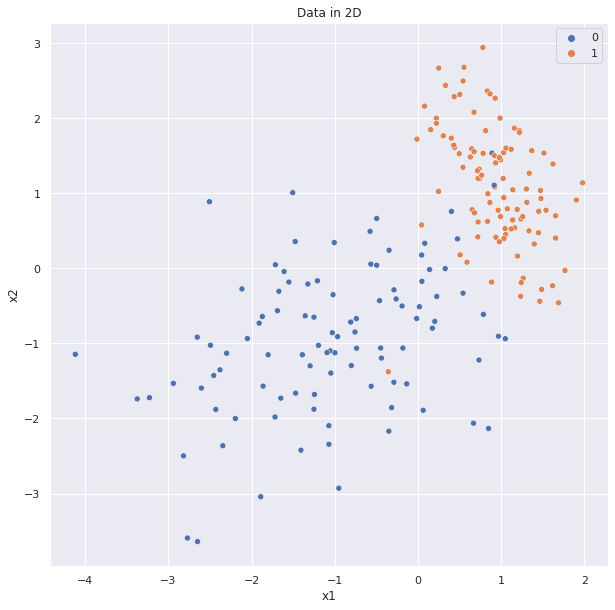

In [ ]:
fig

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
X, y = make_blobs(n_samples=200, n_features=2, centers=2,
                  random_state=0, cluster_std=0.60)

In [ ]:
fig, ax = visualize_2d(X, y);

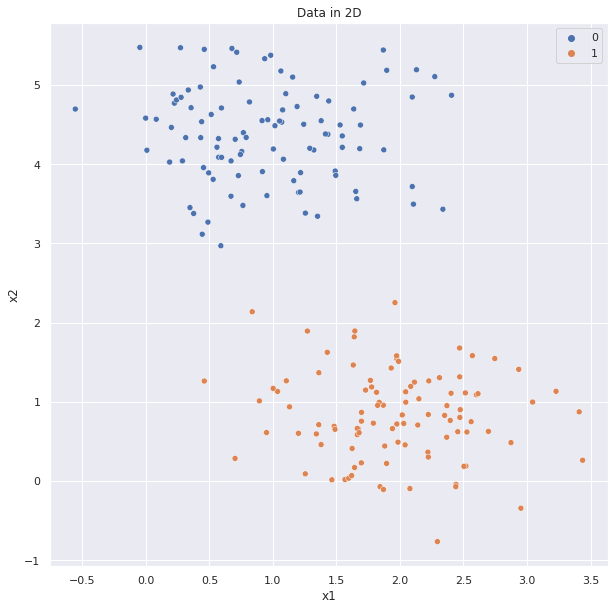

In [ ]:
fig

Visualuze the data

Let's fit a Logistic Regression model on this 2d data

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model = LogisticRegression(fit_intercept=True)
lr_model.fit(X, y)

LogisticRegression()

In [ ]:
def plot_lr_decision_boundary(model, ax=None):
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  # create grid to evaluate model
  x = np.linspace(xlim[0], xlim[1], 30)
  y = np.linspace(ylim[0], ylim[1], 30)
  Y, X = np.meshgrid(y, x)
  xy = np.vstack([X.ravel(), Y.ravel()]).T
  P = model.decision_function(xy).reshape(X.shape)

  # plot decision boundary 
  ax.contour(X, Y, P, colors='k',
            levels=[0], alpha=0.5,
            linestyles=['-'])
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)

Visualize the decision boundry

In [ ]:
plot_lr_decision_boundary(lr_model,ax)

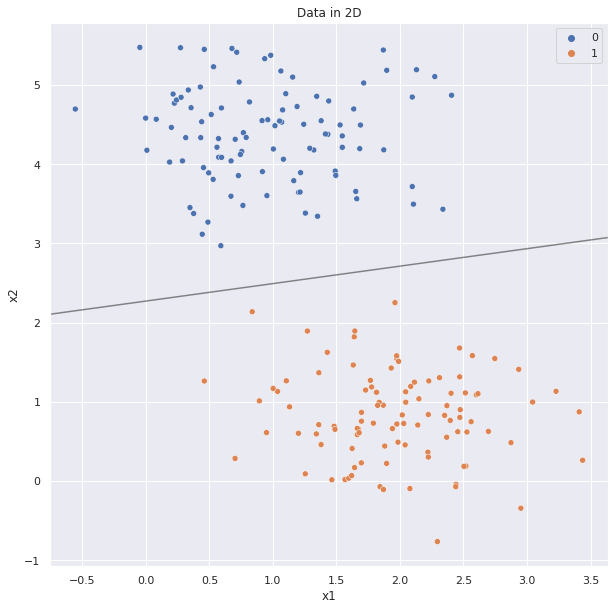

In [ ]:
fig

#### **Encoding Non-linearity: Feature Crosses in Logistic Regression (LR)**

A feature cross is a synthetic feature that encodes nonlinearity in the feature space by multiplying two or more input features together.
Example: x3 = x1*x2

In [ ]:
def create_xor_dataset(num_samples=100):
  np.random.seed(0)
  X = np.random.randn(num_samples, 2)
  y_xor = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
  y = np.where(y_xor, 1, 0)
  return X,y

Generate a non-linearly seperable 2d data set

In [ ]:
X,y = create_xor_dataset(200)

In [ ]:
y[:10]

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1])

In [ ]:
fig, ax = visualize_2d(X, y)

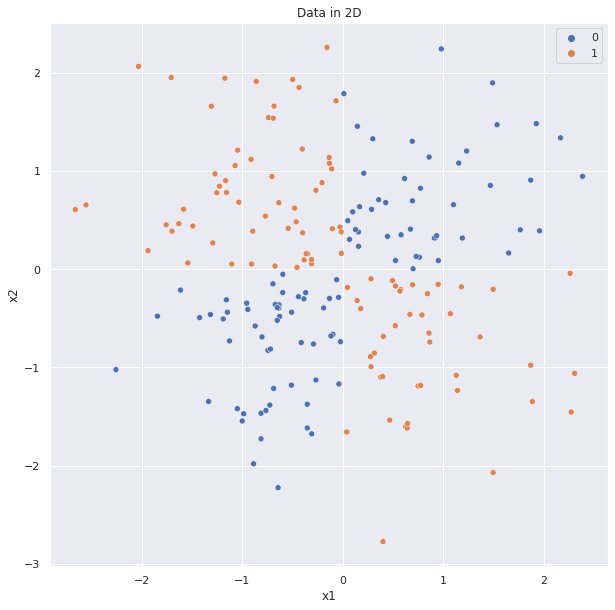

In [ ]:
fig

Run LR model without feature cross

In [ ]:
lr_model = LogisticRegression(fit_intercept=True)
lr_model.fit(X, y)

LogisticRegression()

In [ ]:
plot_lr_decision_boundary(lr_model,ax)

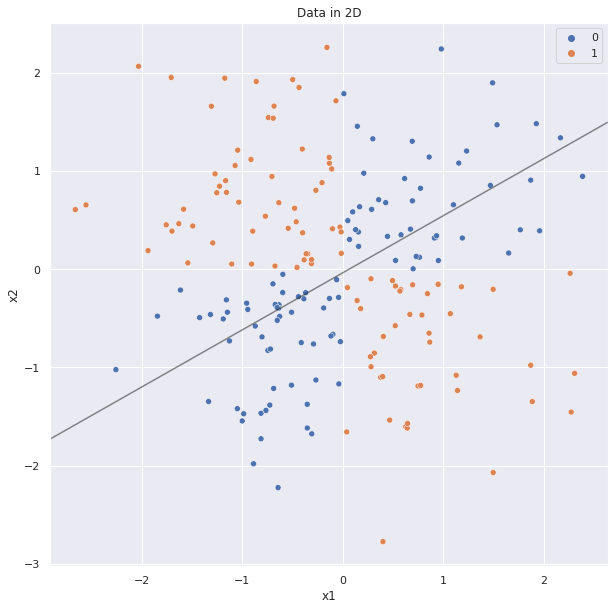

In [ ]:
fig

Transform 2D data to higher dimension

In [ ]:
x3 = np.multiply(X[:, 0], X[:, 1])

In [ ]:
x3.shape

(200,)

In [ ]:
x3[:10]

array([ 0.70589826,  2.19324729, -1.82512311, -0.14380273, -0.04238151,
        0.20947875,  0.09259928,  0.14810577, -0.30652267, -0.26738979])

In [ ]:
X_df = pd.DataFrame([X[:, 0], X[:, 1], x3, y]).T
X_df.columns = ["x1", "x2", "x3", "y"]

In [ ]:
X_df.head()

,x1,x2,x3,y
0,1.764052,0.400157,0.705898,0.0
1,0.978738,2.240893,2.193247,0.0
2,1.867558,-0.977278,-1.825123,1.0
3,0.950088,-0.151357,-0.143803,1.0
4,-0.103219,0.410599,-0.042382,1.0


In [ ]:
X_transformed = X_df[["x1", "x2", "x3"]].values

In [ ]:
X.shape, X_transformed.shape

((200, 2), (200, 3))

In [ ]:
import plotly.express as px

In [ ]:
def visualize_3d(X, y):
  fig = px.scatter_3d(x=X[:,0],y=X[:,1], z=X[:,2], color=y)
  fig.show()

In [ ]:
visualize_3d(X_transformed,y)

Run LR model with feature cross

In [ ]:
X.shape, X_transformed.shape, y.shape

((200, 2), (200, 3), (200,))

In [ ]:
lr_model_2d = LogisticRegression()
lr_model_3d = LogisticRegression()

In [ ]:
lr_model_2d.fit(X,y)
lr_model_3d.fit(X_transformed,y)

LogisticRegression()

In [ ]:
y1 = lr_model_2d.predict(X)
y2 = lr_model_3d.predict(X_transformed)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y,y1))

              precision    recall  f1-score   support

           0       0.53      0.49      0.51        99
           1       0.54      0.57      0.56       101

    accuracy                           0.54       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.53      0.54      0.53       200



In [ ]:
print(classification_report(y,y2))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        99
           1       0.99      1.00      1.00       101

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



In [ ]:
def get_training_results(model, X, y):
  #model = LogisticRegression()
  model.fit(X,y)
  y_pred = model.predict(X)
  print(classification_report(y, y_pred))

Try another dataset

In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(200, factor=.3, noise=.3)


In [ ]:
fig, ax = visualize_2d(X, y)

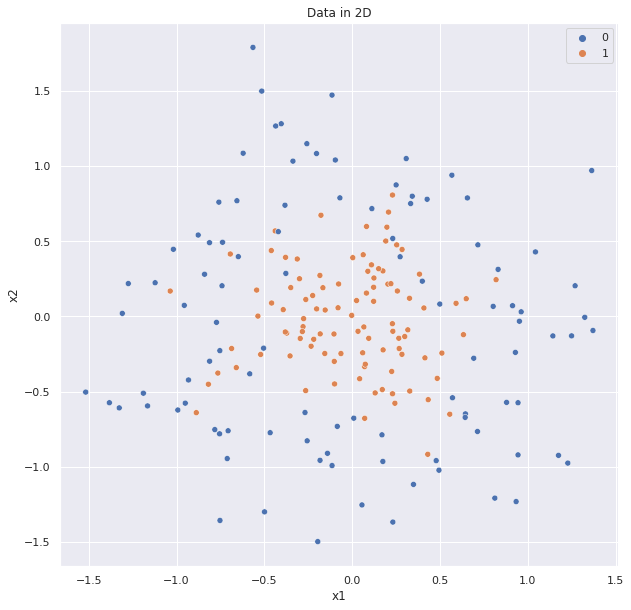

In [ ]:
fig

In [ ]:
x3 = r = np.exp(-(X ** 2).sum(1))

In [ ]:
X_df = pd.DataFrame([X[:, 0], X[:, 1], x3, y]).T
X_df.columns = ["x1", "x2", "x3", "y"]

In [ ]:
X_df.head()

,x1,x2,x3,y
0,0.715036,0.475182,0.478512,0.0
1,-0.264964,-0.493707,0.730554,1.0
2,-0.203261,1.082189,0.297468,0.0
3,0.231085,-1.367744,0.146004,0.0
4,1.226807,-0.975575,0.085709,0.0


In [ ]:
X_transformed = X_df[["x1", "x2", "x3"]].values

In [ ]:
X.shape, X_transformed.shape

((200, 2), (200, 3))

In [ ]:
visualize_3d(X_transformed, y)

In [ ]:
get_training_results(LogisticRegression(), X, y)

              precision    recall  f1-score   support

           0       0.52      0.53      0.53       100
           1       0.53      0.52      0.52       100

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.52       200
weighted avg       0.53      0.53      0.52       200



In [ ]:
get_training_results(LogisticRegression(), X_transformed, y)

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       100
           1       0.89      0.90      0.90       100

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.89       200



**Sklearn polynomial transformation**
Generates polynomial and interaction features.

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

Link: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html



We define the following polynomial features of degree $d$ for two variables $x_1$ and $x_2$:

$$\large \{x_1^d, x_1^{d-1}x_2, \ldots x_2^d\} =  \{x_1^ix_2^j\}_{i+j=d, i,j \in \mathbb{N}}$$

For example, for $d=3$, this will be the following features:

$$\large 1, x_1, x_2,  x_1^2, x_1x_2, x_2^2, x_1^3, x_1^2x_2, x_1x_2^2, x_2^3$$

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [ ]:
X[:10]

array([[ 0.71503557,  0.47518198],
       [-0.26496447, -0.49370665],
       [-0.20326145,  1.08218897],
       [ 0.23108476, -1.36774398],
       [ 1.22680673, -0.97557477],
       [ 1.36998774, -0.09424726],
       [-0.11506998,  1.4706774 ],
       [ 0.55501757, -0.65073803],
       [ 0.64873062,  0.11700594],
       [ 0.341636  ,  0.79855108]])

In [ ]:
poly = PolynomialFeatures(2)

In [ ]:
X_transformed = poly.fit_transform(X)

In [ ]:
X_transformed[:10]

array([[ 1.        ,  0.71503557,  0.47518198,  0.51127587,  0.33977202,
         0.22579792],
       [ 1.        , -0.26496447, -0.49370665,  0.07020617,  0.13081472,
         0.24374626],
       [ 1.        , -0.20326145,  1.08218897,  0.04131522, -0.2199673 ,
         1.17113297],
       [ 1.        ,  0.23108476, -1.36774398,  0.05340017, -0.31606479,
         1.8707236 ],
       [ 1.        ,  1.22680673, -0.97557477,  1.50505475, -1.19684169,
         0.95174614],
       [ 1.        ,  1.36998774, -0.09424726,  1.87686641, -0.12911759,
         0.00888255],
       [ 1.        , -0.11506998,  1.4706774 ,  0.0132411 , -0.16923083,
         2.16289203],
       [ 1.        ,  0.55501757, -0.65073803,  0.3080445 , -0.36117104,
         0.42345998],
       [ 1.        ,  0.64873062,  0.11700594,  0.42085141,  0.07590534,
         0.01369039],
       [ 1.        ,  0.341636  ,  0.79855108,  0.11671516,  0.2728138 ,
         0.63768383]])

In [ ]:
poly.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

Polynomial transformation in a **sklearn ML pipeline**

Sequentially apply a list of transforms and a final estimator. Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods. The final estimator only needs to implement fit. 

Link: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

In [ ]:
lr_pipe = Pipeline([('poly', PolynomialFeatures(degree=2)), 
                       ('lr_model', LogisticRegression(solver='lbfgs' ))])

In [ ]:
lr_pipe.fit(X,y)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('lr_model', LogisticRegression())])

In [ ]:
fig, ax = visualize_2d(X,y)
plot_lr_decision_boundary(lr_pipe,ax)

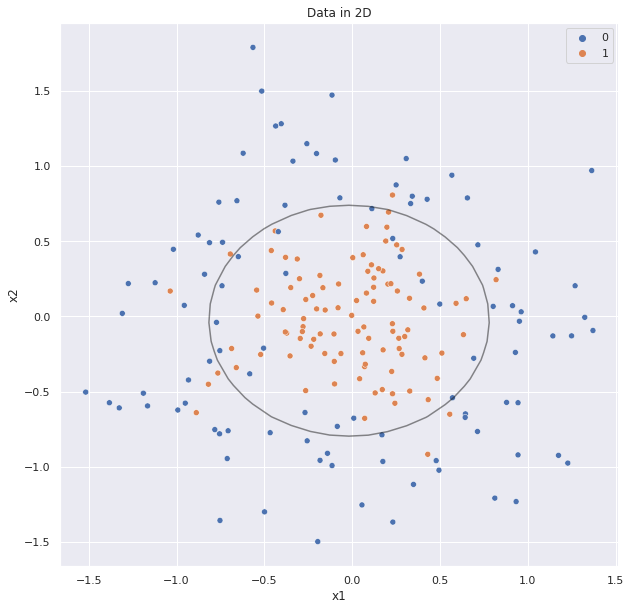

In [ ]:
fig

In [ ]:
lr_pipe.get_params()

{'lr_model': LogisticRegression(),
 'lr_model__C': 1.0,
 'lr_model__class_weight': None,
 'lr_model__dual': False,
 'lr_model__fit_intercept': True,
 'lr_model__intercept_scaling': 1,
 'lr_model__l1_ratio': None,
 'lr_model__max_iter': 100,
 'lr_model__multi_class': 'auto',
 'lr_model__n_jobs': None,
 'lr_model__penalty': 'l2',
 'lr_model__random_state': None,
 'lr_model__solver': 'lbfgs',
 'lr_model__tol': 0.0001,
 'lr_model__verbose': 0,
 'lr_model__warm_start': False,
 'memory': None,
 'poly': PolynomialFeatures(),
 'poly__degree': 2,
 'poly__include_bias': True,
 'poly__interaction_only': False,
 'poly__order': 'C',
 'steps': [('poly', PolynomialFeatures()), ('lr_model', LogisticRegression())],
 'verbose': False}

In [ ]:
lr_pipe.named_steps['poly'].get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

In [ ]:
lr_pipe.named_steps['lr_model'].coef_

array([[ 7.12838656e-06, -1.19307148e-01, -2.02339354e-01,
        -3.28841612e+00, -1.54140750e-02, -3.55649237e+00]])

Some more example synthetic datasets

In [ ]:
X,y = create_xor_dataset(200)

In [ ]:
lr_pipe = Pipeline([('poly', PolynomialFeatures(degree=2)), 
                       ('lr_model', LogisticRegression(solver='lbfgs' ))])

In [ ]:
lr_pipe.fit(X,y)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('lr_model', LogisticRegression())])

In [ ]:
fig, ax = visualize_2d(X,y)
plot_lr_decision_boundary(lr_pipe,ax)

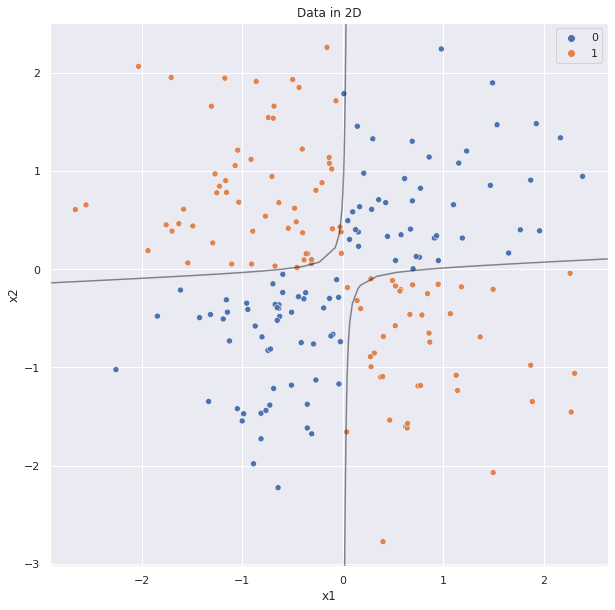

In [ ]:
fig

In [ ]:
lr_pipe.named_steps['poly'].get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

In [ ]:
lr_pipe.named_steps['lr_model'].coef_

array([[ 5.83957924e-05, -6.09770094e-02,  1.36843214e-01,
         2.40568760e-01, -5.09929009e+00,  2.86391298e-02]])

#### **Avoiding overfitting with polynomial transformations**

We demonstrated how polynomial features allow linear models to build nonlinear separating surfaces. Let's now show this visually.

Let's see how regularization affects the quality of classification on a dataset on microchip testing from Andrew Ng's course on machine learning. We will use logistic regression with polynomial features and vary the regularization parameter $C$. First, we will see how regularization affects the separating border of the classifier and intuitively recognize under- and overfitting. 

In [ ]:
# loading data
data = pd.read_csv('microchip_tests.txt',
                   header=None, names = ('test1','test2','released'))

In [ ]:
data.head()

,test1,test2,released
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [ ]:
data.shape

(118, 3)

In [ ]:
from collections import Counter

In [ ]:
Counter(data['released'])

Counter({0: 60, 1: 58})

In [ ]:
X = data[['test1', 'test2']].values
y = data['released'].values

In [ ]:
X.shape, y.shape

((118, 2), (118,))

In [ ]:
fig, ax = visualize_2d(X, y)

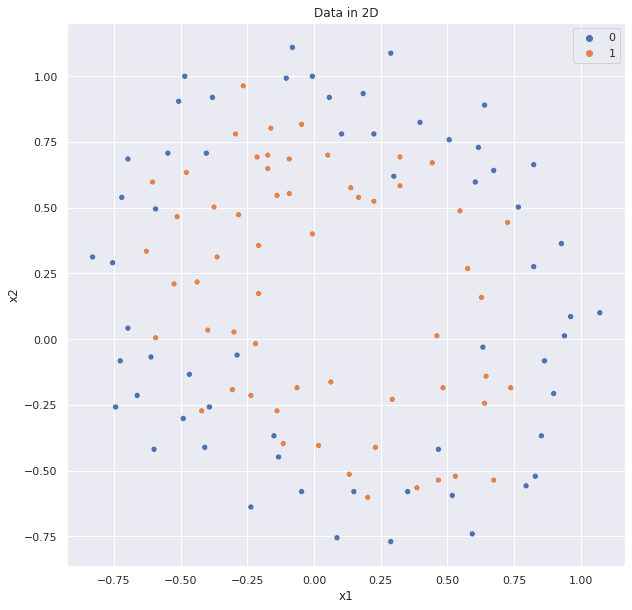

In [ ]:
fig

Let's train logistic regression with regularization parameter $C = 10^{-2}$.

In [ ]:
C = 1e-2
lr_pipe = Pipeline([('poly', PolynomialFeatures(degree=7)), 
                       ('lr_model', LogisticRegression(C= C))])

In [ ]:
lr_pipe.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=7)),
                ('lr_model', LogisticRegression(C=0.01))])

In [ ]:
fig, ax = visualize_2d(X, y)
plot_lr_decision_boundary(lr_pipe, ax)

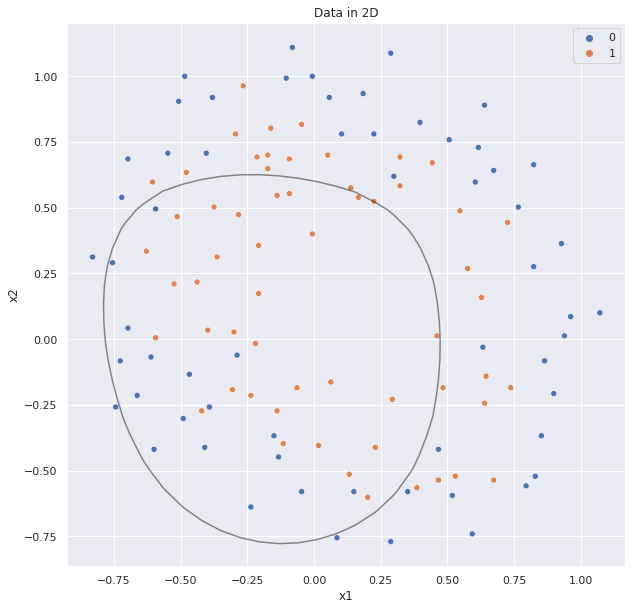

In [ ]:
fig

In [ ]:
get_training_results(lr_pipe, X, y)

              precision    recall  f1-score   support

           0       0.61      0.72      0.66        60
           1       0.65      0.53      0.58        58

    accuracy                           0.63       118
   macro avg       0.63      0.63      0.62       118
weighted avg       0.63      0.63      0.62       118



In [ ]:
print("Accuracy on training set:", 
      round(lr_pipe.score(X, y), 3))

Accuracy on training set: 0.627


We could now try increasing $C$ to 1. In doing this, we weaken regularization, and the solution can now have greater values (in absolute value) of model weights than previously. Now the accuracy of the classifier on the training set improves.

Accuracy on training set: 0.831


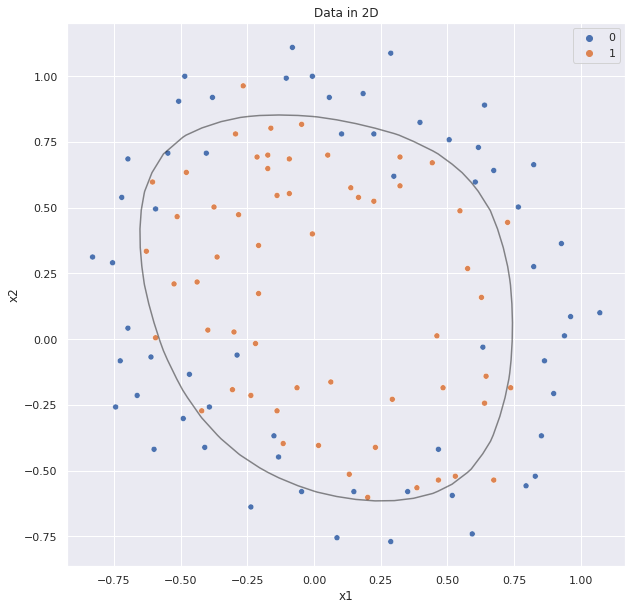

In [ ]:
C = 1
lr_pipe = Pipeline([('poly', PolynomialFeatures(degree=7)), 
                       ('lr_model', LogisticRegression(C= C))])
lr_pipe.fit(X, y)
print("Accuracy on training set:", 
      round(lr_pipe.score(X, y), 3))
fig, ax = visualize_2d(X, y)
plot_lr_decision_boundary(lr_pipe, ax)
fig

Then, why don't we increase $C$ even more - up to 10,000? Now, regularization is clearly not strong enough, and we see overfitting. Note that, with $C$=1 and a "smooth" boundary, the share of correct answers on the training set is not much lower than here. But one can easily imagine how our second model will work much better on new data.

Accuracy on training set: 0.873


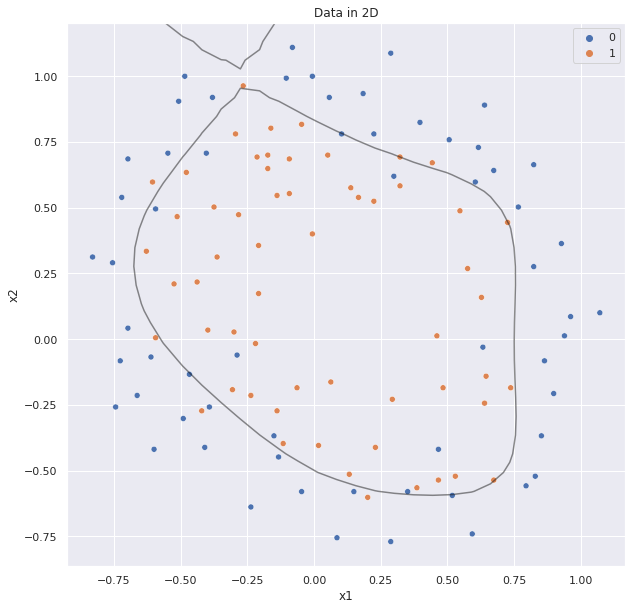

In [ ]:
C = 1e3
lr_pipe = Pipeline([('poly', PolynomialFeatures(degree=7)), 
                       ('lr_model', LogisticRegression(C= C, max_iter=500))])
lr_pipe.fit(X, y)
print("Accuracy on training set:", 
      round(lr_pipe.score(X, y), 3))
fig, ax = visualize_2d(X, y)
plot_lr_decision_boundary(lr_pipe, ax)
fig

To discuss the results, let's rewrite the function that is optimized in logistic regression with the form:

$$\large J(X,y,w) = \mathcal{L} + \frac{1}{C}||w||^2,$$

where

- $\mathcal{L}$ is the logistic loss function summed over the entire dataset
- $C$ is the reverse regularization coefficient (the very same $C$ from `sklearn`'s implementation of `LogisticRegression`)

Questions?

the larger the parameter $C$, the more complex the relationships in the data that the model can recover (intuitively $C$ corresponds to the "complexity" of the model - model capacity)
- if regularization is too strong i.e. the values of $C$ are small, the solution to the problem of minimizing the logistic loss function may be the one where many of the weights are too small or zeroed. The model is also not sufficiently "penalized" for errors (i.e. in the function $J$, the sum of the squares of the weights "outweighs", and the error $\mathcal{L}$ can be relatively large). In this case, the model will underfit as we saw in our first case.
- on the contrary, if regularization is too weak i.e. the values of $C$ are large, a vector $w$ with high absolute value components can become the solution to the optimization problem. In this case, $\mathcal{L}$ has a greater contribution to the optimized functional $J$. Loosely speaking, the model is too "afraid" to be mistaken on the objects from the training set and will therefore overfit as we saw in the third case.
- logistic regression will not "understand" (or "learn") what value of $C$ to choose as it does with the weights $w$. That is to say, it can not be determined by solving the optimization problem in logistic regression. We have seen a similar situation before -- a decision tree can not "learn" what depth limit to choose during the training process. Therefore, $C$ is the a model hyperparameter that is tuned on cross-validation; so is the max_depth in a tree.

Demo: https://developers.google.com/machine-learning/crash-course/regularization-for-simplicity/playground-exercise-examining-l2-regularization

#### **Another linear classifier: Support Vector Machines (SVM): Recap**

Generate Linearly seperable data

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)


A linear discriminative classifier would attempt to draw a straight line separating the two sets of data, and thereby create a model for classification. For two dimensional data like that shown here, this is a task we could do by hand. But immediately we see a problem: there is more than one possible dividing line that can perfectly discriminate between the two classes!

We can draw them as follows:


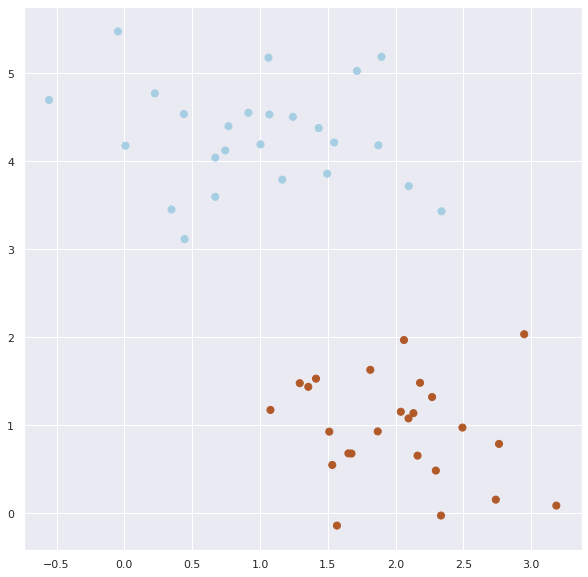

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Paired')

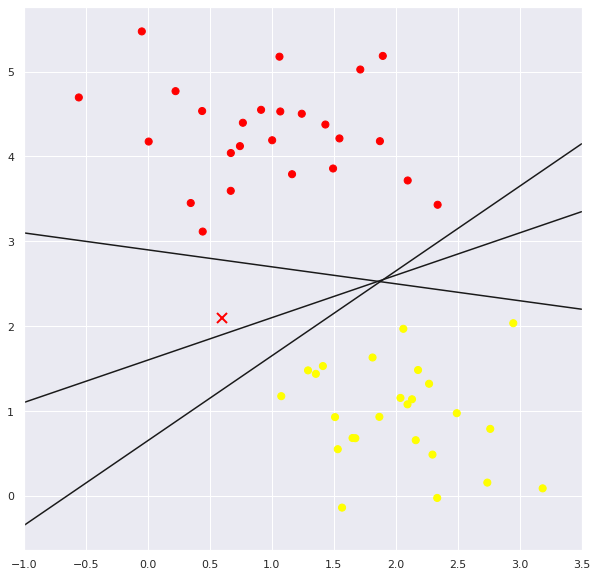

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

These are three very different separators which, nevertheless, perfectly discriminate between these samples. Depending on which you choose, a new data point (e.g., the one marked by the "X" in this plot) will be assigned a different label! Evidently our simple intuition of "drawing a line between classes" is not enough, and we need to think a bit deeper.

**SVM: Maximizing the Margin** 

Support vector machines offer one way to improve on this. The intuition is this: rather than simply drawing a zero-width line between the classes, we can draw around each line a margin of some width, up to the nearest point. Here is an example of how this might look:

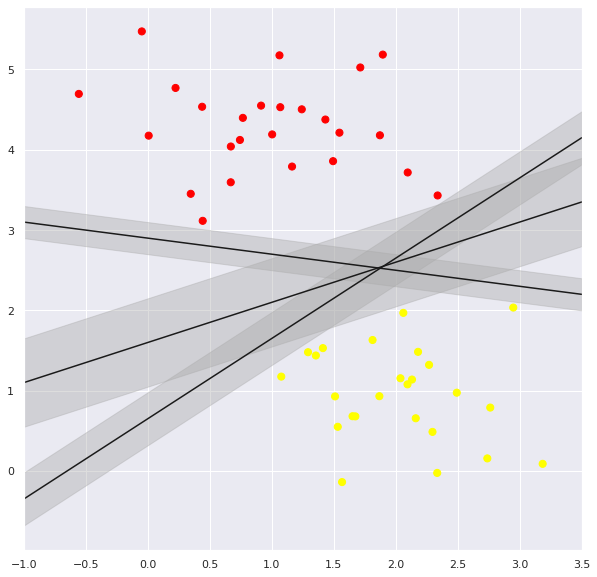

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In support vector machines, the line that maximizes this margin is the one we will choose as the optimal model. Support vector machines are an example of such a maximum margin estimator.

Fit a SVM

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"

In [ ]:
model = SVC(kernel='linear')
model.fit(X, y)

SVC(kernel='linear')

Visualize the decision boundry with support vectors

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

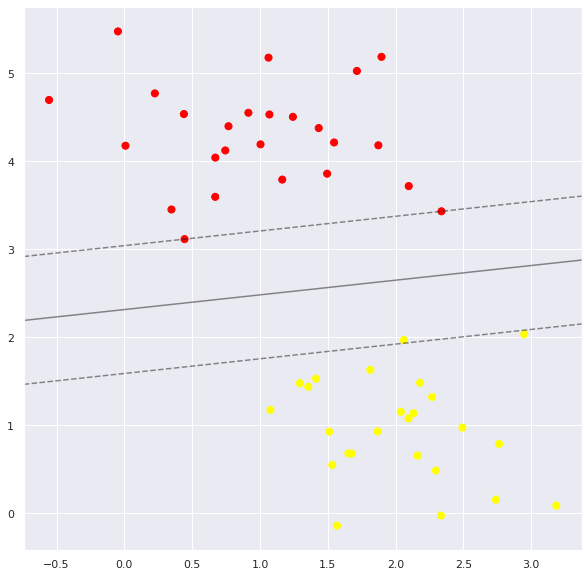

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

This is the dividing line that maximizes the margin between the two sets of points. Notice that a few of the training points just touch the margin: they are indicated by the black circles in this figure. These points are the pivotal elements of this fit, and are known as the support vectors, and give the algorithm its name. 

In [ ]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

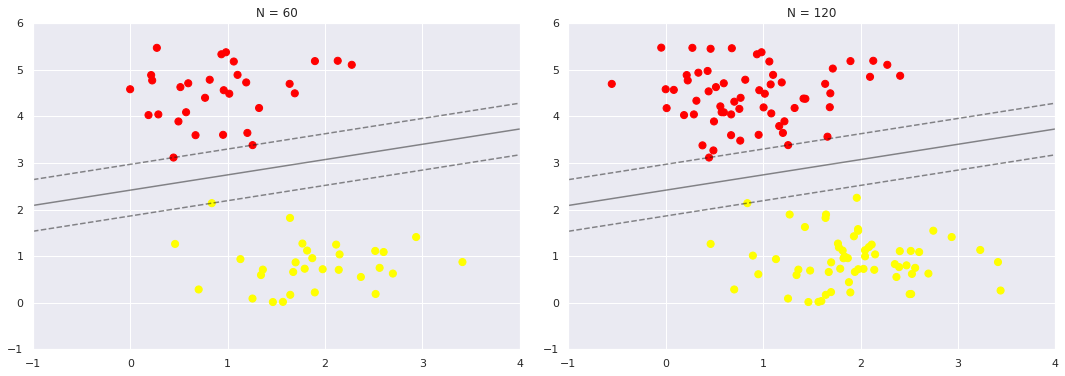

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

#### **Beyond linear boundaries: Kernel SVM**

Where SVM becomes extremely powerful is when it is combined with kernels. We have seen a version of kernels before, in the basis polynomial transformations in Logistic Regression. There we projected our data into higher-dimensional space defined by feature crosses, and thereby were able to fit for nonlinear relationships with a linear classifier.

Generate non-linear seperable dataset and fit linear SVM

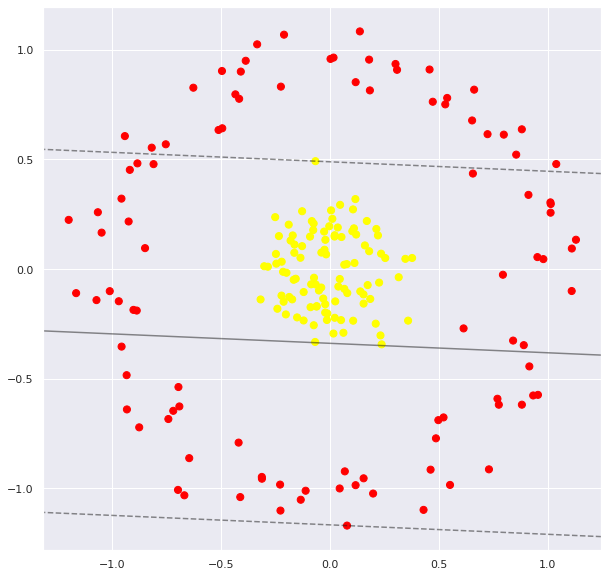

In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(200, factor=.2, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=True);

In [ ]:
get_training_results(clf, X, y)

              precision    recall  f1-score   support

           0       1.00      0.38      0.55       100
           1       0.62      1.00      0.76       100

    accuracy                           0.69       200
   macro avg       0.81      0.69      0.66       200
weighted avg       0.81      0.69      0.66       200



If we could find a higher dimensional space in which these points were linearly separable, then we could do the following:

*  Map the original features to the higher, transformer space (feature mapping)
* Perform linear SVM in this higher space
*  Obtain a set of weights corresponding to the decision boundary hyperplane
*  Map this hyperplane back into the original 2D space to obtain a non linear decision boundary

There are many higher dimensional spaces in which these points are linearly separable. Here is one example

x1,x2:→z1,z2,z3
z1=√x1x2  z2=x1^2  z3=x1*x^2

This is where the Kernel trick comes into play.

Learn more kernels here : 

https://www.youtube.com/watch?v=mTyT-oHoivA


https://www.youtube.com/watch?v=XfyR_49hfi8


Kernel is a way of computing the dot product of two vectors x and y in some (possibly very high dimensional) feature space, which is why kernel functions are sometimes called "generalized dot product". 

The RBF and polynomial are especially useful when the data-points are not linearly separable.

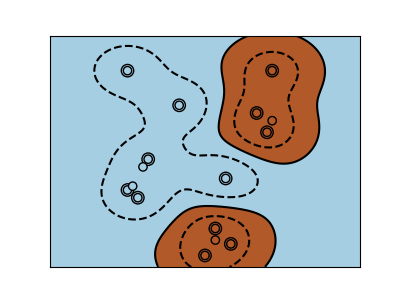

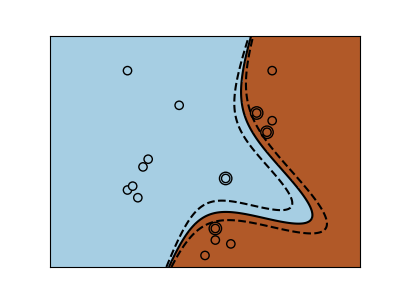

Fitting a radial basis function (**RBF**) kernel

RBF kernels are the most generalized form of kernelization and is one of the most widely used kernels due to its similarity to the Gaussian distribution. The RBF kernel function for two points X₁ and X₂ computes the similarity or how close they are to each other.

In [ ]:
clf = SVC(kernel='rbf')
clf.fit(X, y)

SVC()

In [ ]:
get_training_results(clf, X, y)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



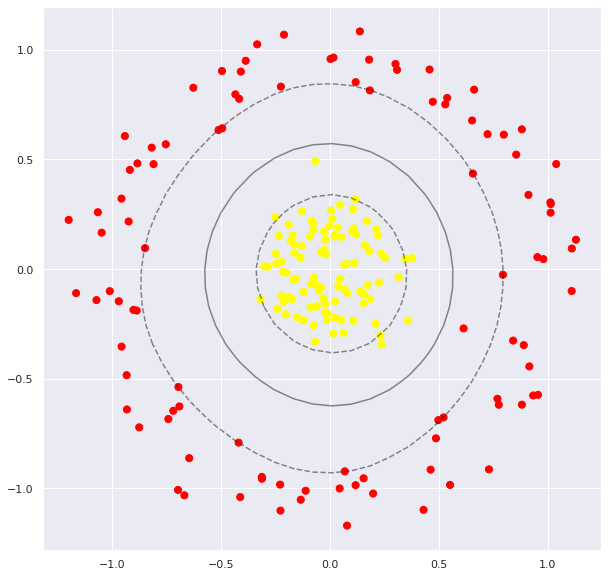

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=True);

Fitting a polynomial kernel. This kernel is useful is the decision boundary is can be seperated by a higher-order polynomial

              precision    recall  f1-score   support

           0       1.00      0.25      0.40       100
           1       0.57      1.00      0.73       100

    accuracy                           0.62       200
   macro avg       0.79      0.62      0.56       200
weighted avg       0.79      0.62      0.56       200



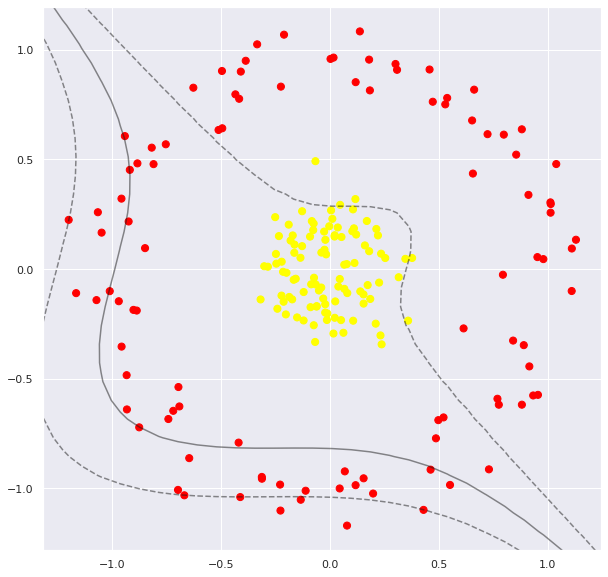

In [ ]:
clf = SVC(kernel='poly')
clf.fit(X, y)
get_training_results(clf, X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=True);

**Another dataset**

In [ ]:
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.3)

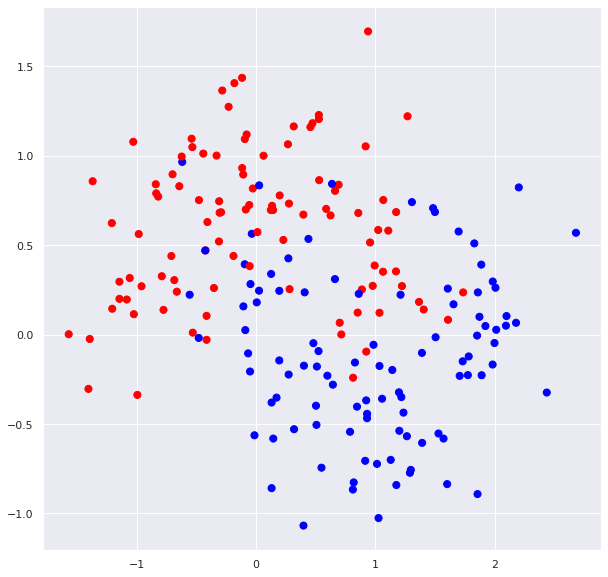

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cm_bright)

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       100
           1       0.83      0.79      0.81       100

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200



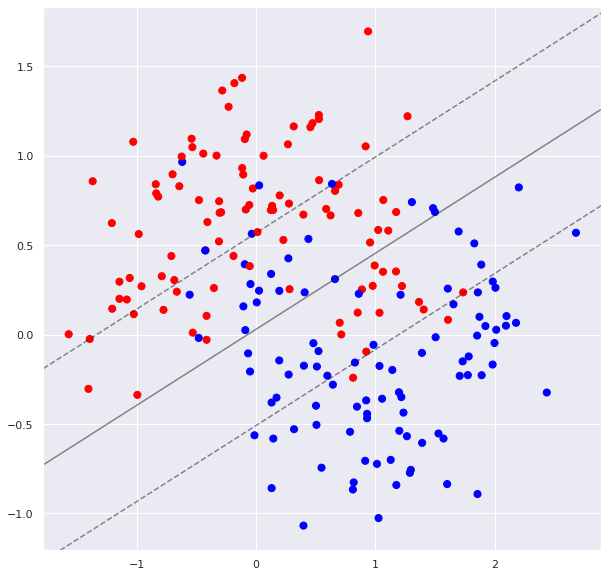

In [ ]:
clf = SVC(kernel='linear').fit(X, y)
get_training_results(clf, X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cm_bright)
plot_svc_decision_function(clf, plot_support=True);

              precision    recall  f1-score   support

           0       0.73      0.91      0.81       100
           1       0.88      0.67      0.76       100

    accuracy                           0.79       200
   macro avg       0.81      0.79      0.79       200
weighted avg       0.81      0.79      0.79       200



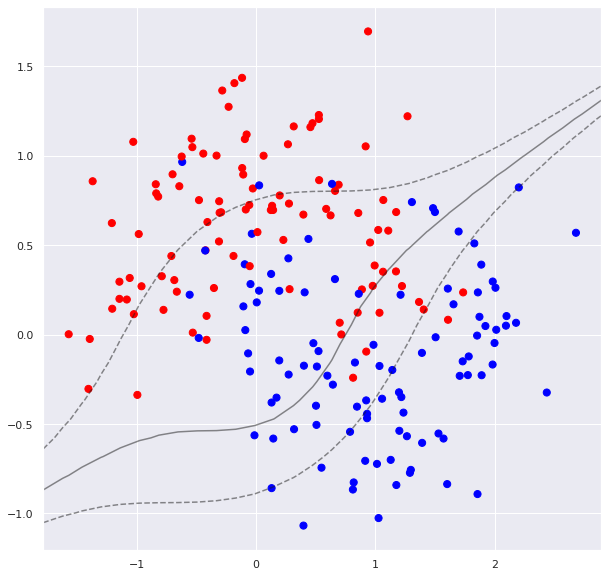

In [ ]:
clf = SVC(kernel='poly').fit(X, y)
get_training_results(clf, X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cm_bright)
plot_svc_decision_function(clf, plot_support=True);

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       100
           1       0.88      0.83      0.86       100

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



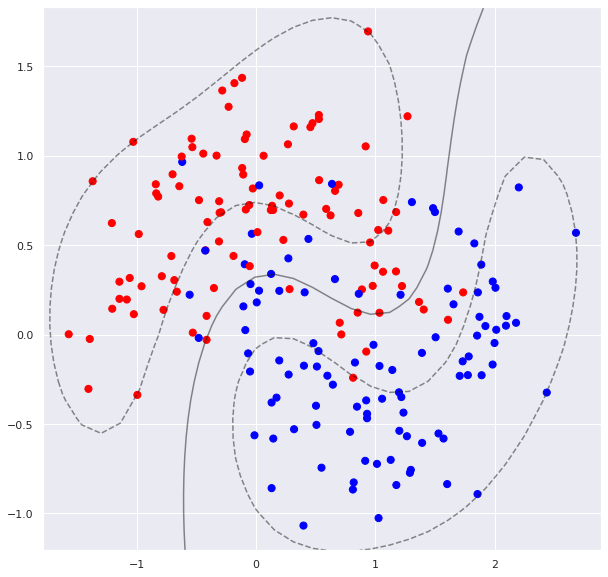

In [ ]:
clf = SVC(kernel='rbf').fit(X, y)
get_training_results(clf, X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cm_bright)
plot_svc_decision_function(clf, plot_support=True);

Some summeray statement here.

**The END** <br>
**Authors: Dr. Samir Gupta, Dr. Matthew McCoy & ICBI AIM-AHEAD Team**

<img src="https://raw.githubusercontent.com/ICBI/AIMAHEAD_GU_publicCourseData/main/HIDSLOGO.AA1.jpg" alt="Powered by" width="500"/>
